In [57]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
print(os.getcwd())

C:\Users\LE HOANG NHAN\PycharmProjects\life_expectancy_years_Gapminder


In [58]:

print(os.listdir(os.getcwd()))

['.idea', '.ipynb_checkpoints', 'life_expectancy_years_Gapminder.csv', 'life_expectancy_years_Gapminder.ipynb', 'venv']


In [59]:
# Read in the data file: df
gapminder = pd.read_csv('life_expectancy_years_Gapminder.csv', delimiter=',')

In [60]:
# Print the output of df.head()
print(gapminder.head())

  Life expectancy  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0     Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...   
1         Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...   
2         Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...   
3         Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   

   2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
0  55.7  56.2  56.7  57.2  57.7  57.8  57.9  58.0  58.4  58.7  
1  75.9  76.3  76.7  77.0  77.2  77.4  77.6  77.7  77.9  78.0  
2  76.3  76.5  76.7  76.8  77.0  77.1  77.3  77.4  77.6  77.9  
3  82.7  82.7  82.6  82.6  82.6  82.6  82.5  82.5   NaN   NaN  
4  59.3  60.1  60.9  61.7  62.5  63.3  64.0  64.7  64.9  65.2  

[5 rows x 220 columns]


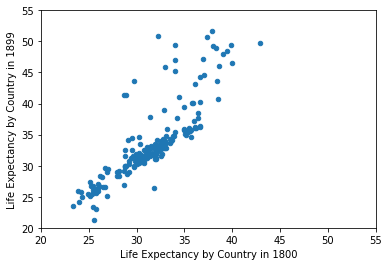

In [62]:
#Visualizing your data
# Create the scatter plot
gapminder.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

In [63]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert gapminder.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert gapminder.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert gapminder['Life expectancy'].value_counts()[0] == 1

In [64]:
#Reshaping data

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=gapminder, id_vars=['Life expectancy'])

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

       country  year  life_expectancy
0  Afghanistan  1800             28.2
1      Albania  1800             35.4
2      Algeria  1800             28.8
3      Andorra  1800              NaN
4       Angola  1800             27.0


In [71]:
#Checking the data types
gapminder = gapminder_melt

# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64


In [72]:
#Looking at country spellings
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = gapminder['country'].drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~ mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


38          Congo, Dem. Rep.
39               Congo, Rep.
41             Cote d'Ivoire
69             Guinea-Bissau
98            Macedonia, FYR
109    Micronesia, Fed. Sts.
167              Timor-Leste
Name: country, dtype: object


In [73]:
#More data cleaning and processing

# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)


(40437, 3)


year
1800    31.502717
1801    31.461957
1802    31.478804
1803    31.383152
1804    31.459239
Name: life_expectancy, dtype: float64
year
2014    71.622995
2015    71.933690
2016    72.206952
2017    72.422283
2018    72.658152
Name: life_expectancy, dtype: float64


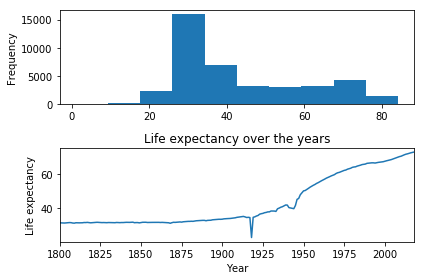

C:\Users\LE HOANG NHAN\PycharmProjects\life_expectancy_years_Gapminder\venv\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [74]:
# creating a histogram of the life_expectancy column

# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
